In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir #to concat csv files
from datetime import datetime, date, timedelta

%matplotlib inline

In [2]:
# Read Dataset  rfp_approval_1990, rfp_approval_2000, rfp_reg_2012, rfp_reg_2015, rfp_reg_2017
rfp_approval_1990_csv = 'resale-flat-prices-based-on-approval-date-1990-1999.csv'
rfp_approval_1990 = pd.read_csv(rfp_approval_1990_csv)

rfp_approval_2000_csv = 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
rfp_approval_2000 = pd.read_csv(rfp_approval_2000_csv)

rfp_reg_2012_csv = 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
rfp_reg_2012 = pd.read_csv(rfp_reg_2012_csv)

rfp_reg_2015_csv = 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
rfp_reg_2015 = pd.read_csv(rfp_reg_2015_csv)

rfp_reg_2017_csv = 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
rfp_reg_2017 = pd.read_csv(rfp_reg_2017_csv)

In [3]:
#Check for null values
df_list=[rfp_approval_1990,rfp_approval_2000,rfp_reg_2015,rfp_reg_2017,rfp_reg_2012]
df_list_names=['rfp_approval_1990','rfp_approval_2000','rfp_reg_2015','rfp_reg_2017','rfp_reg_2012']

for i, n in zip(df_list, df_list_names):
    null_status = i.isnull().values.any()
    if null_status:
        print(n + " has null values")
    else:
        print(n + " doesn't have null values")

rfp_approval_1990 doesn't have null values
rfp_approval_2000 doesn't have null values
rfp_reg_2015 doesn't have null values
rfp_reg_2017 doesn't have null values
rfp_reg_2012 doesn't have null values


In [4]:
#rfp_approval_1990

#Clean data
#change data type to datetime
rfp_approval_1990["month"] = pd.to_datetime(rfp_approval_1990["month"])
rfp_approval_1990["lease_commence_date"] = pd.to_datetime(rfp_approval_1990["lease_commence_date"], format = '%Y')

#Calculate lease end date
#rfp_approval_1990['lease_end'] = rfp_approval_1990["lease_commence_date"] + timedelta(days=365.25*99)

#Calculate remaining lease
rfp_approval_1990['remaining_lease_days'] = timedelta(days=365.25*99) - (rfp_approval_1990.month - rfp_approval_1990.lease_commence_date)
#rfp_approval_1990['remaining_lease_days'] = pd.to_timedelta(rfp_approval_1990['remaining_lease_days'], errors='coerce').dt.days

rfp_approval_1990['remaining_lease_years'] = (rfp_approval_1990['remaining_lease_days']) / 365.25 

#Convert remaining lease (years) to float #used to cast a pandas object to a specified dtype
rfp_approval_1990['remaining_lease_years'] = rfp_approval_1990['remaining_lease_years'].astype('timedelta64[D]')

#Convert to csv
rfp_approval_1990.to_csv("rfp_approval_1990.csv", index=False)

rfp_approval_1990

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_days,remaining_lease_years
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000,31411 days 18:00:00,86.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000,31411 days 18:00:00,86.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000,31411 days 18:00:00,86.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000,31411 days 18:00:00,86.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200,31045 days 18:00:00,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
287191,1999-12-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987-01-01,456000,31442 days 18:00:00,86.0
287192,1999-12-01,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988-01-01,408000,31807 days 18:00:00,87.0
287193,1999-12-01,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988-01-01,469000,31807 days 18:00:00,87.0
287194,1999-12-01,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988-01-01,440000,31807 days 18:00:00,87.0


In [5]:
#rfp_approval_2000

#Clean data
#change data type to datetime
rfp_approval_2000["month"] = pd.to_datetime(rfp_approval_2000["month"])
rfp_approval_2000["lease_commence_date"] = pd.to_datetime(rfp_approval_2000["lease_commence_date"], format = '%Y')

rfp_approval_2000['remaining_lease_days'] = timedelta(days=365.25*99) - (rfp_approval_2000.month - rfp_approval_2000.lease_commence_date)
#rfp_approval_2000['remaining_lease_days'] = pd.to_timedelta(rfp_approval_2000['remaining_lease_days'], errors='coerce').dt.days

rfp_approval_2000['remaining_lease_years'] = (rfp_approval_2000['remaining_lease_days']) / 365.25
rfp_approval_2000['remaining_lease_years'] = rfp_approval_2000['remaining_lease_years'].astype('timedelta64[D]')

rfp_approval_2000.to_csv("rfp_approval_2000.csv", index=False)

In [6]:
#rfp_reg_2012

#Clean data
#change data type to datetime
rfp_reg_2012["month"] = pd.to_datetime(rfp_reg_2012["month"])
rfp_reg_2012["lease_commence_date"] = pd.to_datetime(rfp_reg_2012["lease_commence_date"], format = '%Y')

rfp_reg_2012['remaining_lease_days'] = timedelta(days=365.25*99) - (rfp_reg_2012.month - rfp_reg_2012.lease_commence_date)
#rfp_reg_2012['remaining_lease_days'] = pd.to_timedelta(rfp_reg_2012['remaining_lease_days'], errors='coerce').dt.days

rfp_reg_2012['remaining_lease_years'] = (rfp_reg_2012['remaining_lease_days']) / 365.25
rfp_reg_2012['remaining_lease_years'] = rfp_reg_2012['remaining_lease_years'].astype('timedelta64[D]')

rfp_reg_2012.to_csv("rfp_reg_2012.csv", index=False)

In [7]:
#rfp_reg_2015

#Clean data
#change data type to datetime
rfp_reg_2015["month"] = pd.to_datetime(rfp_reg_2015["month"])
rfp_reg_2015["lease_commence_date"] = pd.to_datetime(rfp_reg_2015["lease_commence_date"], format = '%Y')

#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
#pd.to_datetime(df.Year, format='%Y')

rfp_reg_2015['remaining_lease_days'] = timedelta(days=365.25*99) - (rfp_reg_2015.month - rfp_reg_2015.lease_commence_date)
#rfp_reg_2015['remaining_lease_days'] = pd.to_timedelta(rfp_reg_2015['remaining_lease_days'], errors='coerce').dt.days

rfp_reg_2015['remaining_lease_years'] = (rfp_reg_2015['remaining_lease_days']) / 365.25
rfp_reg_2015['remaining_lease_years'] = rfp_reg_2015['remaining_lease_years'].astype('timedelta64[D]')
rfp_reg_2015['remaining_lease_years'] = rfp_reg_2015['remaining_lease_years']

#Drop existing remaining_lease column
rfp_reg_2015 = rfp_reg_2015.drop(['remaining_lease'], axis=1)

rfp_reg_2015.to_csv("rfp_reg_2015.csv", index=False)

In [8]:
#rfp_reg_2017

#Clean data
#change data type to datetime
rfp_reg_2017["month"] = pd.to_datetime(rfp_reg_2017["month"])
rfp_reg_2017["lease_commence_date"] = pd.to_datetime(rfp_reg_2017["lease_commence_date"], format = '%Y')

rfp_reg_2017['remaining_lease_days'] = timedelta(days=365.25*99) - (rfp_reg_2017.month - rfp_reg_2017.lease_commence_date)
#rfp_reg_2017['remaining_lease_days'] = pd.to_timedelta(rfp_reg_2017['remaining_lease_days'], errors='coerce').dt.days

rfp_reg_2017['remaining_lease_years'] = (rfp_reg_2017['remaining_lease_days']) / 365.25
rfp_reg_2017['remaining_lease_years'] = rfp_reg_2017['remaining_lease_years'].astype('timedelta64[D]')

#Drop existing remaining_lease column
rfp_reg_2017 = rfp_reg_2017.drop(['remaining_lease'], axis=1)

rfp_reg_2017.to_csv("rfp_reg_2017.csv", index=False)

In [9]:
#Combine DataFrames together
df_merged = [rfp_approval_1990, rfp_approval_2000, rfp_reg_2012, rfp_reg_2015, rfp_reg_2017]
df = pd.concat(df_merged)

In [10]:
#Cleaning Date
df.insert(1, 'date', (df['month'].astype("datetime64"))) #insert a new column at specific location
df.insert(1, 'year', (df['month'].dt.year))
df['month'] = df['month'].dt.month

In [11]:
#Create new column price_sqm
resale_price = df.resale_price
floor_area_sqm = df.floor_area_sqm
df.insert(10, 'price_sqm', (df['resale_price']/df['floor_area_sqm'])) #insert a new column at specific location

In [12]:
#Create new column for price per remaining year
#remaining_lease = df.remaining_lease_years
#df.insert(15, 'price_per_remaining_year', (df['resale_price']/df['remaining_lease_years']))

In [13]:
df.dtypes

month                              int64
year                               int64
date                      datetime64[ns]
town                              object
flat_type                         object
block                             object
street_name                       object
storey_range                      object
floor_area_sqm                   float64
flat_model                        object
price_sqm                        float64
lease_commence_date       datetime64[ns]
resale_price                     float64
remaining_lease_days     timedelta64[ns]
remaining_lease_years            float64
dtype: object

In [14]:
df

,month,year,date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,price_sqm,lease_commence_date,resale_price,remaining_lease_days,remaining_lease_years
0,1,1990,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,290.322581,1977-01-01,9000.0,31411 days 18:00:00,86.0
1,1,1990,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,193.548387,1977-01-01,6000.0,31411 days 18:00:00,86.0
2,1,1990,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,258.064516,1977-01-01,8000.0,31411 days 18:00:00,86.0
3,1,1990,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,193.548387,1977-01-01,6000.0,31411 days 18:00:00,86.0
4,1,1990,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,646.575342,1976-01-01,47200.0,31045 days 18:00:00,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100220,6,2021,2021-06-01,YISHUN,5 ROOM,505C,YISHUN ST 51,10 TO 12,112.0,Improved,5491.071429,2016-01-01,615000.0,34181 days 18:00:00,93.0
100221,6,2021,2021-06-01,YISHUN,EXECUTIVE,664,YISHUN AVE 4,01 TO 03,181.0,Apartment,4795.580110,1992-01-01,868000.0,25415 days 18:00:00,69.0
100222,6,2021,2021-06-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,3848.684211,1985-01-01,585000.0,22859 days 18:00:00,62.0
100223,6,2021,2021-06-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,4109.589041,1987-01-01,600000.0,23589 days 18:00:00,64.0


In [15]:
df.corr()

,month,year,floor_area_sqm,price_sqm,resale_price,remaining_lease_years
month,1.000000,-0.025151,0.002447,0.010466,0.009546,0.017104
year,-0.025151,1.000000,0.072946,0.754702,0.616774,-0.444639
floor_area_sqm,0.002447,0.072946,1.000000,0.117516,0.615888,0.376003
price_sqm,0.010466,0.754702,0.117516,1.000000,0.827986,-0.279396
resale_price,0.009546,0.616774,0.615888,0.827986,1.000000,-0.014038
remaining_lease_years,0.017104,-0.444639,0.376003,-0.279396,-0.014038,1.000000


In [16]:
#Set Index and Filter by 'date' 1 year periods (past 10 years)
df_date = df.set_index('date')
df_2021 = df_date.loc['2021-01-01':'2021-12-31'] 
df_2020 = df_date.loc['2020-01-01':'2020-12-31'] 
df_2019 = df_date.loc['2019-01-01':'2019-12-31'] 
df_2018 = df_date.loc['2018-01-01':'2018-12-31']
df_2017 = df_date.loc['2017-01-01':'2017-12-31']
df_2016 = df_date.loc['2016-01-01':'2016-12-31']
df_2015 = df_date.loc['2015-01-01':'2015-12-31']
df_2014 = df_date.loc['2014-01-01':'2014-12-31']
df_2013 = df_date.loc['2013-01-01':'2013-12-31']
df_2012 = df_date.loc['2012-01-01':'2012-12-31']
label_months = list(range(1,13))
degrees = 90
my_colors = ['black', 'red', 'green', 'blue', 'cyan']

<bound method NDFrame._add_numeric_operations.<locals>.max of month
1     68735
2     60812
3     73999
4     69960
5     70028
6     72404
7     74978
8     72222
9     70312
10    74947
11    71108
12    66923
Name: flat_type, dtype: int64>

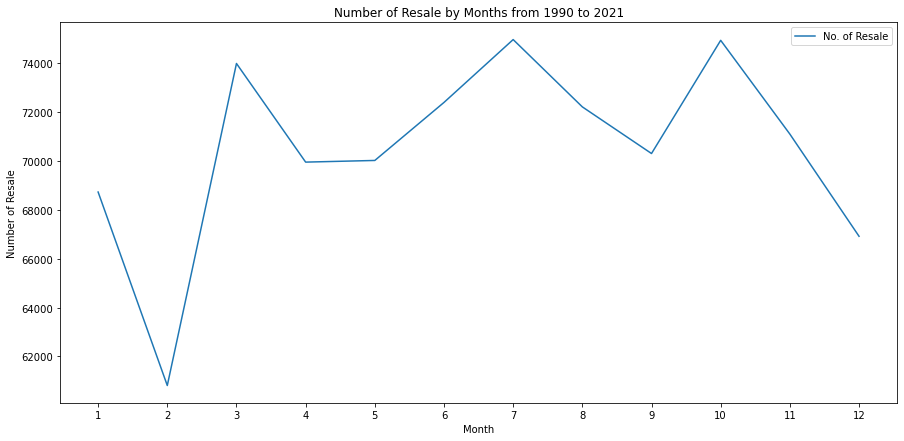

In [17]:
#Number of Resale by Months from 1990 to 2021
df.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='No. of Resale', figsize=(15,7))
plt.title("Number of Resale by Months from 1990 to 2021")
plt.xlabel("Month")
plt.ylabel("Number of Resale")
plt.legend(loc=1) #location of legend at top right
df.groupby(by=['month']).flat_type.count().max

In [18]:
df_10y = df[df['year'].between(2012, 2021)] #filter 10 years out from df
df_5y_2021 = df[df['year'].between(2017, 2021)]
df_5y_2016 = df[df['year'].between(2012, 2016)]

<bound method NDFrame._add_numeric_operations.<locals>.max of month
1     15030
2     13218
3     17932
4     17212
5     16893
6     17340
7     17027
8     16444
9     15587
10    16724
11    15424
12    13938
Name: flat_type, dtype: int64>

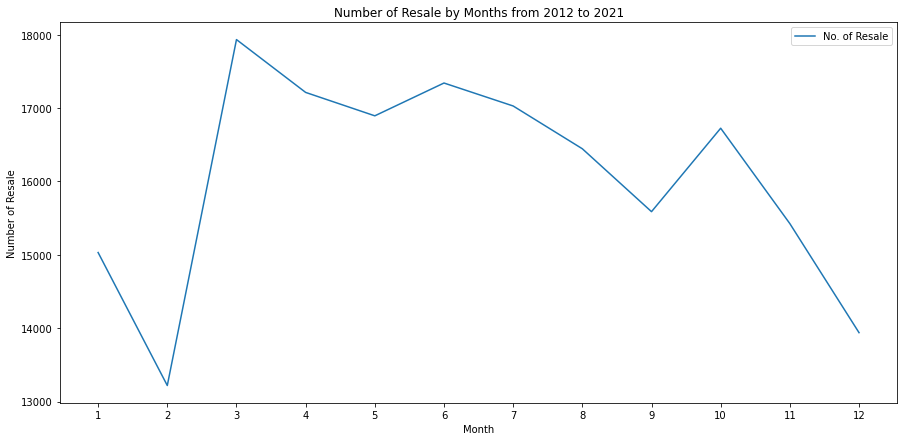

In [19]:
#Number of Resale by Months from 2012 to 2021
df_10y.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='No. of Resale', figsize=(15,7))
plt.title("Number of Resale by Months from 2012 to 2021")
plt.xlabel("Month")
plt.ylabel("Number of Resale")
plt.legend(loc=1) #location of legend at top right
df_10y.groupby(by=['month']).flat_type.count().max

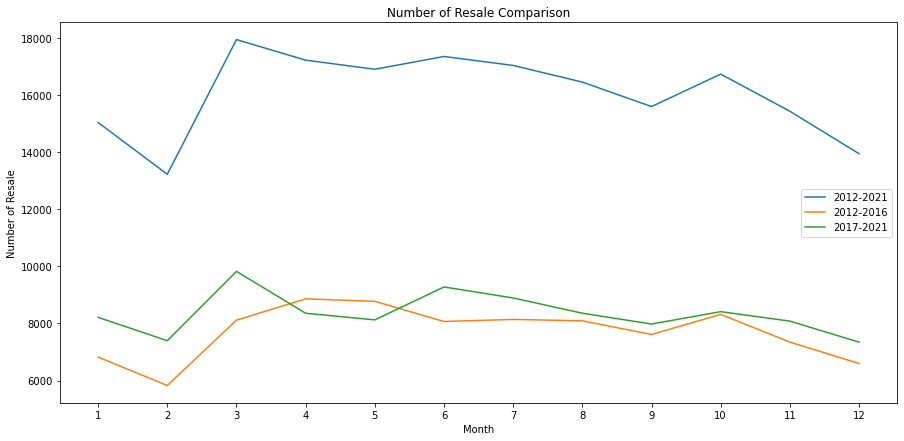

In [20]:
#Number of Resale Comparison
df_10y.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2012-2021',figsize=(15,7))
df_5y_2016.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2012-2016', figsize=(15,7))
df_5y_2021.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2017-2021', figsize=(15,7))
plt.title("Number of Resale Comparison")
plt.xlabel("Month")
plt.ylabel("Number of Resale")
plt.legend(loc=5) #location of legend at middle right

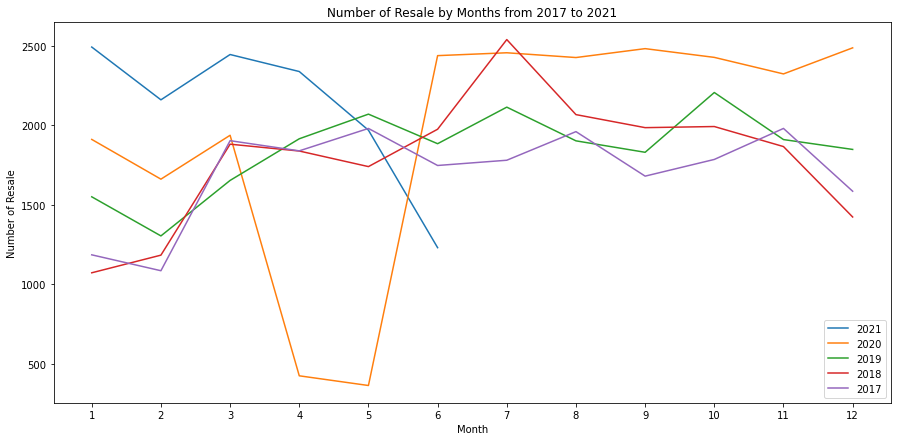

In [21]:
#Number of Resale by Months from 2017 to 2021
df_2021.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2021',figsize=(15,7))
df_2020.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2020',figsize=(15,7))
df_2019.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2019',figsize=(15,7))
df_2018.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2018',figsize=(15,7))
df_2017.groupby(by=['month']).flat_type.count().plot(kind="line", xticks=label_months, label='2017',figsize=(15,7))
plt.title("Number of Resale by Months from 2017 to 2021")
plt.xlabel("Month")
plt.ylabel("Number of Resale")
plt.legend(loc=4) #location of legend at lower right

<bound method NDFrame._add_numeric_operations.<locals>.max of flat_type
1 ROOM                 48
2 ROOM               1507
3 ROOM              23660
4 ROOM              41660
5 ROOM              25270
EXECUTIVE            8029
MULTI-GENERATION       51
Name: flat_type, dtype: int64>

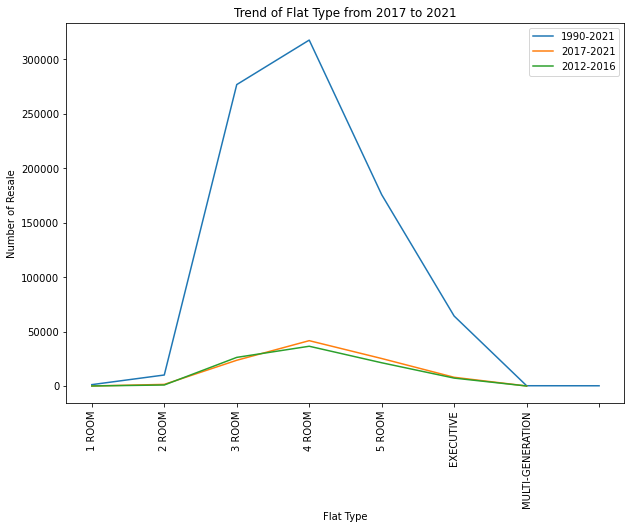

In [22]:
#Trend of Flat Type
df.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='1990-2021')
df_5y_2021.groupby(by=['flat_type']).flat_type.count().plot(kind="line", label='2017-2021', rot=degrees)
df_5y_2016.groupby(by=['flat_type']).flat_type.count().plot(kind="line", label='2012-2016', rot=degrees)
plt.title("Trend of Flat Type from 2017 to 2021")
plt.xlabel("Flat Type")
plt.ylabel("Number of Resale")
plt.legend(loc=1) #location of legend at top right
#df.groupby(by=['flat_type']).flat_type.count().max
#df_5y_2016.groupby(by=['flat_type']).flat_type.count().max
df_5y_2021.groupby(by=['flat_type']).flat_type.count().max


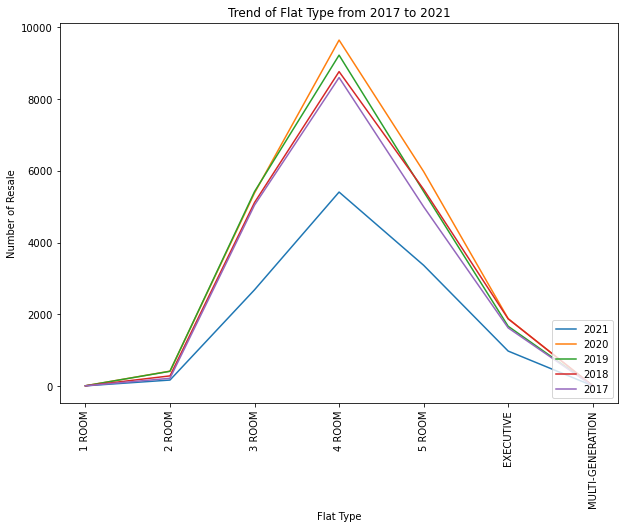

In [23]:
#Trend of Flat Type from 2017 to 2021
df_2021.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='2021')
df_2020.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='2020')
df_2019.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='2019')
df_2018.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='2018')
df_2017.groupby(by=['flat_type']).flat_type.count().plot(kind="line", figsize=(10,7), rot=degrees, label='2017')
plt.title("Trend of Flat Type from 2017 to 2021")
plt.xlabel("Flat Type")
plt.ylabel("Number of Resale")
plt.legend(loc=4) #location of legend at lower right


<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO         49014
BEDOK              62512
BISHAN             19976
BUKIT BATOK        40948
BUKIT MERAH        31304
BUKIT PANJANG      25048
BUKIT TIMAH         2344
CENTRAL AREA        6515
CHOA CHU KANG      34287
CLEMENTI           26249
GEYLANG            26205
HOUGANG            46515
JURONG EAST        23274
JURONG WEST        61779
KALLANG/WHAMPOA    24592
LIM CHU KANG          64
MARINE PARADE       7526
PASIR RIS          30942
PUNGGOL            14199
QUEENSTOWN         26610
SEMBAWANG          11322
SENGKANG           25788
SERANGOON          21498
TAMPINES           74564
TOA PAYOH          29167
WOODLANDS          59787
YISHUN             64399
Name: flat_type, dtype: int64>

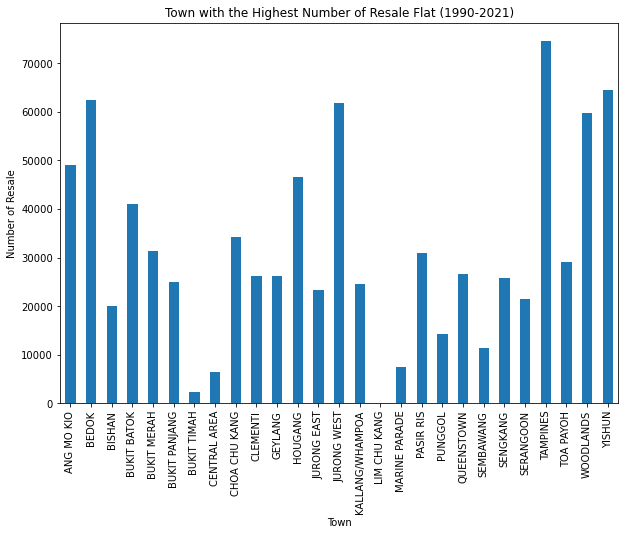

In [24]:
#Town with the Highest Number of Resale Flat (1990-2021)
df.groupby(by=['town']).flat_type.count().plot(kind="bar", figsize=(10,7), rot=degrees, label='2021')
plt.title("Town with the Highest Number of Resale Flat (1990-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df.groupby(by=['town']).flat_type.count().max

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO          8948
BEDOK              11539
BISHAN              3660
BUKIT BATOK         7230
BUKIT MERAH         7505
BUKIT PANJANG       7265
BUKIT TIMAH          473
CENTRAL AREA        1578
CHOA CHU KANG       8160
CLEMENTI            4598
GEYLANG             5103
HOUGANG             9622
JURONG EAST         4360
JURONG WEST        14628
KALLANG/WHAMPOA     5592
MARINE PARADE       1243
PASIR RIS           6171
PUNGGOL            10057
QUEENSTOWN          5352
SEMBAWANG           4724
SENGKANG           14189
SERANGOON           4003
TAMPINES           13426
TOA PAYOH           6205
WOODLANDS          14470
YISHUN             12668
Name: flat_type, dtype: int64>

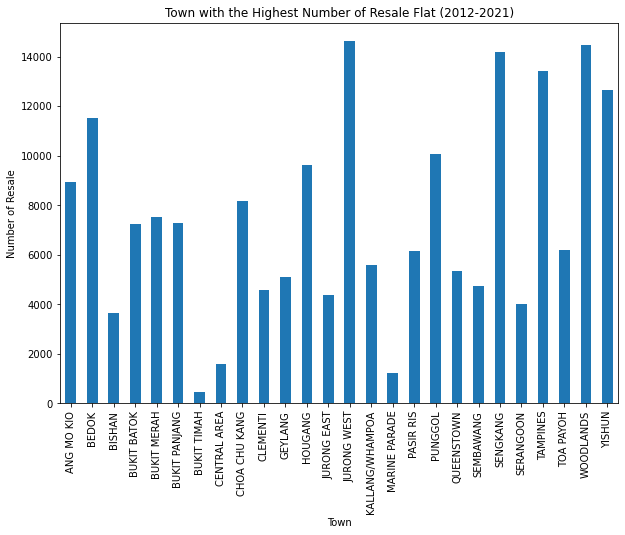

In [25]:
#Town with the Highest Number of Resale Flat (2012-2021)
df_10y.groupby(by=['town'])['flat_type'].count().plot(kind="bar", figsize=(10,7), rot=degrees, label='2012-2021')
plt.title("Town with the Highest Number of Resale Flat (2012-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df_10y.groupby(by=['town']).flat_type.count().max

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO         4390
BEDOK              5468
BISHAN             1989
BUKIT BATOK        3457
BUKIT MERAH        3887
BUKIT PANJANG      4004
BUKIT TIMAH         281
CENTRAL AREA        828
CHOA CHU KANG      4232
CLEMENTI           2279
GEYLANG            2454
HOUGANG            4887
JURONG EAST        2203
JURONG WEST        7055
KALLANG/WHAMPOA    2837
MARINE PARADE       603
PASIR RIS          3096
PUNGGOL            6982
QUEENSTOWN         2828
SEMBAWANG          2410
SENGKANG           8293
SERANGOON          1974
TAMPINES           6698
TOA PAYOH          3288
WOODLANDS          7071
YISHUN             6731
Name: flat_type, dtype: int64>

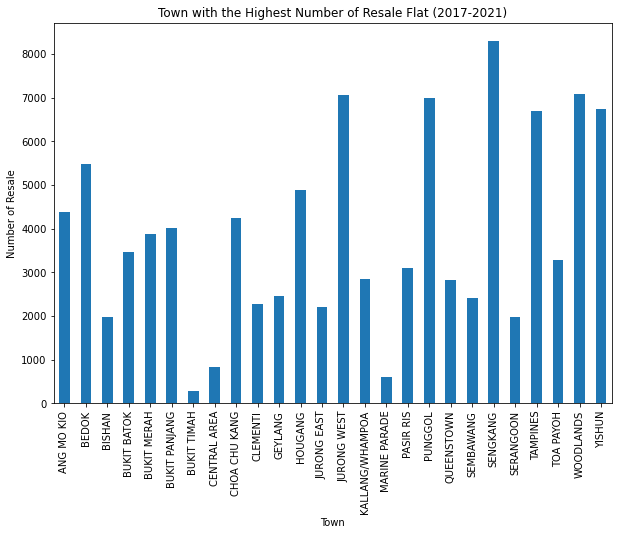

In [26]:
#Town with the Highest Number of Resale Flat (2017-2021)
df_5y_2021.groupby(by=['town'])['flat_type'].count().plot(kind="bar", figsize=(10,7), rot=degrees, label='2017-2021')
plt.title("Town with the Highest Number of Resale Flat (2017-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df_5y_2021.groupby(by=['town'])['flat_type'].count().max

In [27]:
three_rm = df_5y_2021['flat_type']=='3 ROOM'
df_5y_2021_three_rm = df_5y_2021[three_rm]
print(df_5y_2021_three_rm)

four_rm = df_5y_2021['flat_type']=='4 ROOM'
df_5y_2021_four_rm = df_5y_2021[four_rm]

five_rm = df_5y_2021['flat_type']=='5 ROOM'
df_5y_2021_five_rm = df_5y_2021[five_rm]

        month  year       date        town flat_type block        street_name  \
1           1  2017 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4   
2           1  2017 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5   
3           1  2017 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10   
4           1  2017 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5   
5           1  2017 2017-01-01  ANG MO KIO    3 ROOM   150   ANG MO KIO AVE 5   
...       ...   ...        ...         ...       ...   ...                ...   
100179      6  2021 2021-06-01      YISHUN    3 ROOM   123       YISHUN ST 11   
100180      6  2021 2021-06-01      YISHUN    3 ROOM   273       YISHUN ST 22   
100181      6  2021 2021-06-01      YISHUN    3 ROOM   627       YISHUN ST 61   
100182      6  2021 2021-06-01      YISHUN    3 ROOM   718       YISHUN ST 71   
100183      6  2021 2021-06-01      YISHUN    3 ROOM   735       YISHUN ST 72   

       storey_range  floor_

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO         2347
BEDOK              2283
BISHAN              200
BUKIT BATOK        1201
BUKIT MERAH        1371
BUKIT PANJANG       468
BUKIT TIMAH          50
CENTRAL AREA        327
CHOA CHU KANG       270
CLEMENTI           1074
GEYLANG            1100
HOUGANG             976
JURONG EAST         719
JURONG WEST        1271
KALLANG/WHAMPOA    1254
MARINE PARADE       293
PASIR RIS            78
PUNGGOL             618
QUEENSTOWN         1226
SEMBAWANG            92
SENGKANG            559
SERANGOON           413
TAMPINES           1361
TOA PAYOH          1415
WOODLANDS           828
YISHUN             1866
Name: flat_type, dtype: int64>

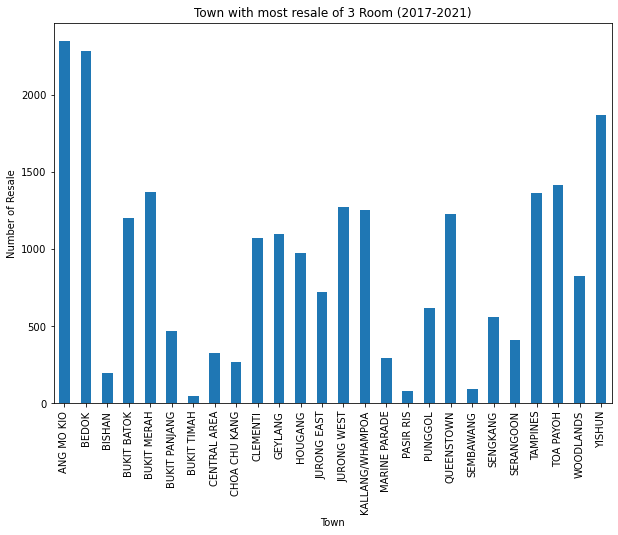

In [28]:
#Town with most resale of 3 Room (2017-2021)
df_5y_2021_three_rm.groupby(by=['town']).flat_type.count().plot(kind="bar", figsize=(10,7), rot=degrees)
plt.title("Town with most resale of 3 Room (2017-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df_5y_2021_three_rm.groupby(by=['town']).flat_type.count().max

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO         1214
BEDOK              1836
BISHAN              950
BUKIT BATOK        1369
BUKIT MERAH        1439
BUKIT PANJANG      1858
BUKIT TIMAH          99
CENTRAL AREA        341
CHOA CHU KANG      1999
CLEMENTI            808
GEYLANG             848
HOUGANG            2123
JURONG EAST         648
JURONG WEST        2612
KALLANG/WHAMPOA     897
MARINE PARADE       156
PASIR RIS          1203
PUNGGOL            3889
QUEENSTOWN         1086
SEMBAWANG          1059
SENGKANG           4155
SERANGOON           860
TAMPINES           2688
TOA PAYOH          1015
WOODLANDS          3200
YISHUN             3308
Name: flat_type, dtype: int64>

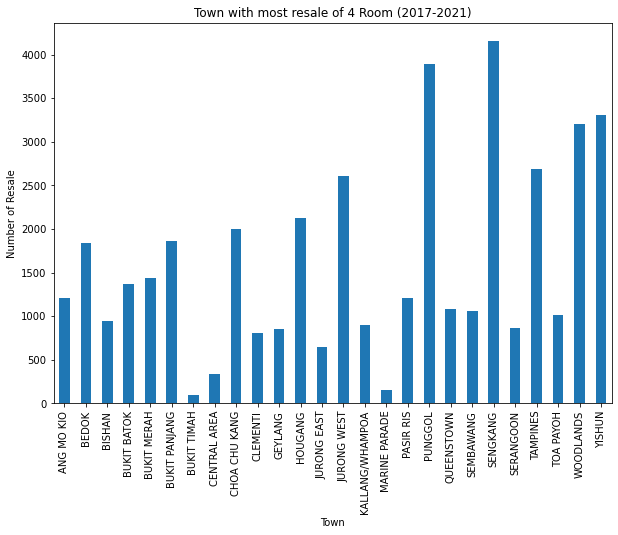

In [29]:
#Town with most resale of 4 Room (2017-2021)
df_5y_2021_four_rm.groupby(by=['town']).flat_type.count().plot(kind="bar", figsize=(10,7), rot=degrees)
plt.title("Town with most resale of 4 Room (2017-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df_5y_2021_four_rm.groupby(by=['town']).flat_type.count().max

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO          696
BEDOK               996
BISHAN              634
BUKIT BATOK         523
BUKIT MERAH         901
BUKIT PANJANG      1190
BUKIT TIMAH          66
CENTRAL AREA        130
CHOA CHU KANG      1426
CLEMENTI            283
GEYLANG             316
HOUGANG            1156
JURONG EAST         561
JURONG WEST        2313
KALLANG/WHAMPOA     572
MARINE PARADE       150
PASIR RIS           981
PUNGGOL            2169
QUEENSTOWN          404
SEMBAWANG           808
SENGKANG           2823
SERANGOON           361
TAMPINES           1840
TOA PAYOH           687
WOODLANDS          2184
YISHUN             1100
Name: flat_type, dtype: int64>

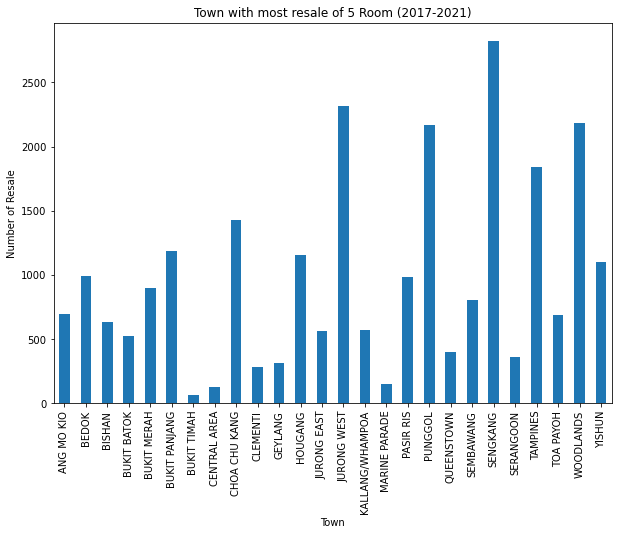

In [30]:
#Town with most resale of 5 Room (2017-2021)
df_5y_2021_five_rm.groupby(by=['town']).flat_type.count().plot(kind="bar", figsize=(10,7), rot=degrees)
plt.title("Town with most resale of 5 Room (2017-2021)")
plt.xlabel("Town")
plt.ylabel("Number of Resale")
df_5y_2021_five_rm.groupby(by=['town']).flat_type.count().max

town
ANG MO KIO         1030000.0
BEDOK               928000.0
BISHAN             1250000.0
BUKIT BATOK         890000.0
BUKIT MERAH        1200000.0
BUKIT PANJANG       858888.0
BUKIT TIMAH        1210000.0
CENTRAL AREA       1258000.0
CHOA CHU KANG       900000.0
CLEMENTI           1095000.0
GEYLANG            1008888.0
HOUGANG            1000000.0
JURONG EAST         900000.0
JURONG WEST         798000.0
KALLANG/WHAMPOA    1268000.0
MARINE PARADE       950000.0
PASIR RIS           858000.0
PUNGGOL             910888.0
QUEENSTOWN         1210000.0
SEMBAWANG           685000.0
SENGKANG            775000.0
SERANGOON          1038000.0
TAMPINES            990000.0
TOA PAYOH          1160888.0
WOODLANDS           850000.0
YISHUN              868000.0
Name: resale_price, dtype: float64


<AxesSubplot:title={'center':'Highest Resale Price (2012-2021)'}, xlabel='town', ylabel='resale_price (million)'>

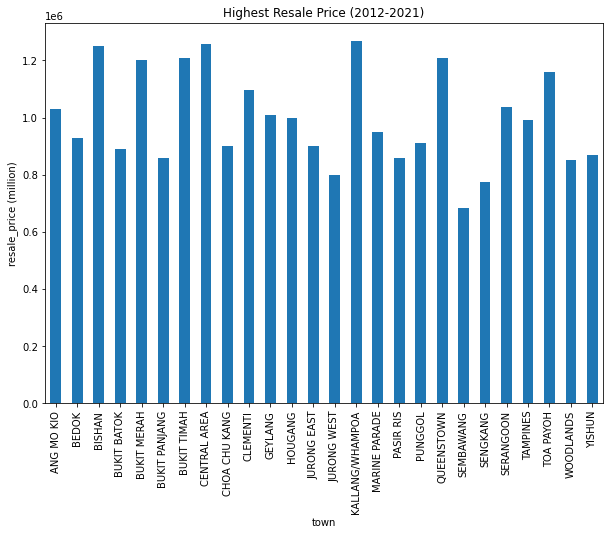

In [31]:
#Highest resale price in each town (2012-2021) 
grouped_town = df_5y_2021.groupby('town')
grouped_town_price_max = grouped_town['resale_price'].max()
print(grouped_town_price_max)

#Highest resale price in total (2012-2021)
grouped_town_price_max.plot(xlabel="town", ylabel="resale_price (million)", title="Highest Resale Price (2012-2021)", kind='bar', figsize=(10,7))

#Highest resale in past 10 years is Kallang/Whampoa at $1,268,000.

<bound method NDFrame._add_numeric_operations.<locals>.max of town
ANG MO KIO         299322.720920
BEDOK              296349.116075
BISHAN             359589.880000
BUKIT BATOK        266989.447127
BUKIT MERAH        382605.339168
BUKIT PANJANG      301163.284188
BUKIT TIMAH        411517.760000
CENTRAL AREA       412349.174312
CHOA CHU KANG      294512.633333
CLEMENTI           334525.805400
GEYLANG            290154.374545
HOUGANG            295338.908811
JURONG EAST        288782.408901
JURONG WEST        264257.619197
KALLANG/WHAMPOA    340658.156300
MARINE PARADE      381124.931741
PASIR RIS          365574.358974
PUNGGOL            361826.966019
QUEENSTOWN         377034.558630
SEMBAWANG          297231.260870
SENGKANG           345709.742397
SERANGOON          315220.581114
TAMPINES           337789.227039
TOA PAYOH          288891.936396
WOODLANDS          267070.663043
YISHUN             280405.421758
Name: resale_price, dtype: float64>

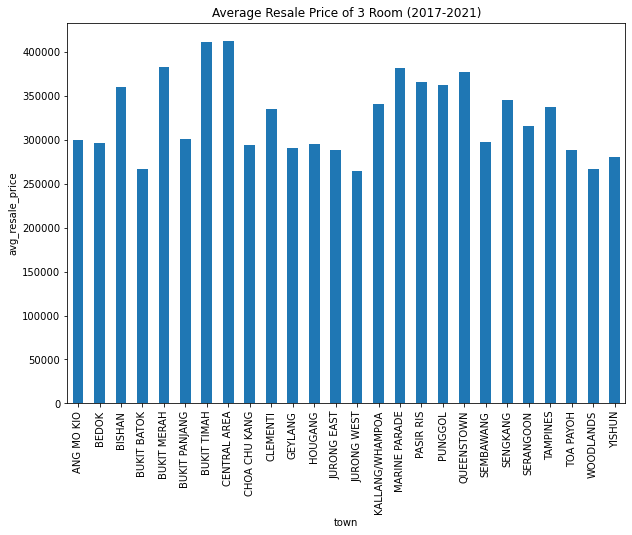

In [32]:
#Average Resale Price of 3 Room (2017-2021)
df_5y_2021_3rm = df_5y_2021[df_5y_2021['flat_type']=='3 ROOM']
gt_3rm = df_5y_2021_3rm.groupby('town')
gt_3rm_avgprice = gt_3rm['resale_price'].mean()
gt_3rm_avgprice.plot.bar(xlabel="town", ylabel="avg_resale_price", title="Average Resale Price of 3 Room (2017-2021)", figsize=(10,7))

gt_3rm_avgprice.max

town
ANG MO KIO         469944.191928
BEDOK              443933.127996
BISHAN             558450.970526
BUKIT BATOK        379950.806428
BUKIT MERAH        657111.281445
BUKIT PANJANG      400412.994080
BUKIT TIMAH        632029.676768
CENTRAL AREA       752677.187683
CHOA CHU KANG      363761.348674
CLEMENTI           565852.009901
GEYLANG            531205.331368
HOUGANG            403431.372058
JURONG EAST        409671.876543
JURONG WEST        373315.199847
KALLANG/WHAMPOA    557358.767982
MARINE PARADE      502456.538462
PASIR RIS          431631.164589
PUNGGOL            461140.346588
QUEENSTOWN         719249.523020
SEMBAWANG          352283.556072
SENGKANG           428165.381651
SERANGOON          458935.046512
TAMPINES           447021.964286
TOA PAYOH          575469.601970
WOODLANDS          346519.180900
YISHUN             365774.422007
Name: resale_price, dtype: float64

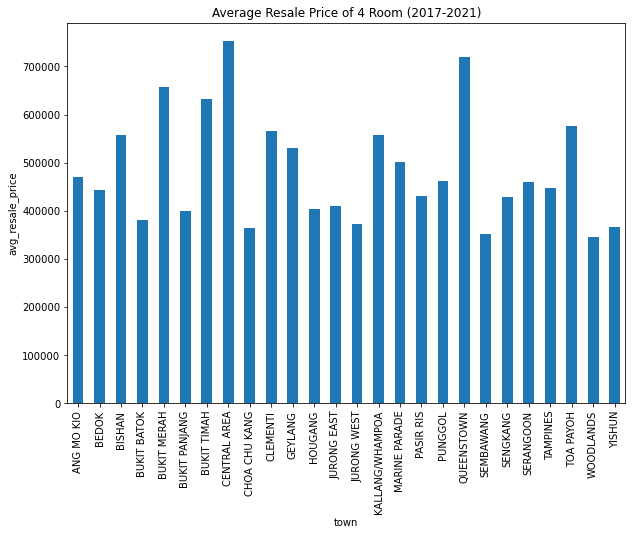

In [33]:
#Average Resale Price of 4 Room (2017-2021)
df_5y_2021_4rm = df_5y_2021[df_5y_2021['flat_type']=='4 ROOM']
gt_4rm = df_5y_2021_4rm.groupby('town')
gt_4rm_avgprice = gt_4rm['resale_price'].mean()
gt_4rm_avgprice.plot.bar(xlabel="town", ylabel="avg_resale_price", title="Average Resale Price of 4 Room (2017-2021)", figsize=(10,7))

gt_4rm_avgprice

town
ANG MO KIO         678361.560345
BEDOK              582746.169679
BISHAN             771287.559937
BUKIT BATOK        525754.537285
BUKIT MERAH        770813.812297
BUKIT PANJANG      497443.302521
BUKIT TIMAH        826254.181818
CENTRAL AREA       947238.300000
CHOA CHU KANG      433901.121318
CLEMENTI           726993.713781
GEYLANG            686629.582278
HOUGANG            528466.576125
JURONG EAST        523613.741533
JURONG WEST        451453.468552
KALLANG/WHAMPOA    730610.905594
MARINE PARADE      800815.440000
PASIR RIS          501826.877676
PUNGGOL            511648.642176
QUEENSTOWN         846993.863564
SEMBAWANG          407752.508663
SENGKANG           479410.875976
SERANGOON          571456.060942
TAMPINES           558972.268478
TOA PAYOH          778199.114993
WOODLANDS          418375.189103
YISHUN             481331.527273
Name: resale_price, dtype: float64

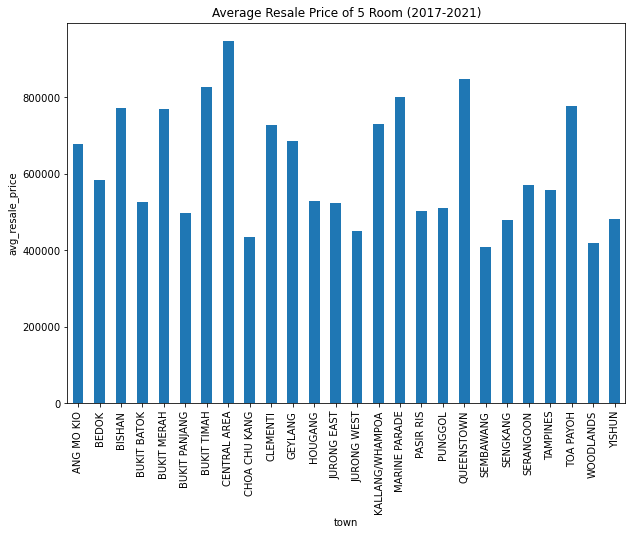

In [34]:
#Average Resale Price of 5 Room (2017-2021)
df_5y_2021_5rm = df_5y_2021[df_5y_2021['flat_type']=='5 ROOM']
gt_5rm = df_5y_2021_5rm.groupby('town')
gt_5rm_avgprice = gt_5rm['resale_price'].mean()
gt_5rm_avgprice.plot.bar(xlabel="town", ylabel="avg_resale_price", title="Average Resale Price of 5 Room (2017-2021)", figsize=(10,7))

gt_5rm_avgprice

town
ANG MO KIO          8626.362637
BEDOK               8735.632184
BISHAN             10416.666667
BUKIT BATOK         7866.666667
BUKIT MERAH        11741.935484
BUKIT PANJANG       7087.912088
BUKIT TIMAH         7857.142857
CENTRAL AREA       12762.236559
CHOA CHU KANG       6170.212766
CLEMENTI            9895.833333
GEYLANG             8709.677419
HOUGANG             7936.500000
JURONG EAST         6291.666667
JURONG WEST         7528.089888
KALLANG/WHAMPOA    10410.256410
MARINE PARADE       8017.094017
PASIR RIS           8615.384615
PUNGGOL             6785.714286
QUEENSTOWN         10843.373494
SEMBAWANG           6700.000000
SENGKANG            7222.222222
SERANGOON           7390.625000
TAMPINES            8547.619048
TOA PAYOH          10175.438596
WOODLANDS           6044.776119
YISHUN              6875.000000
Name: price_sqm, dtype: float64


12762.236559139785

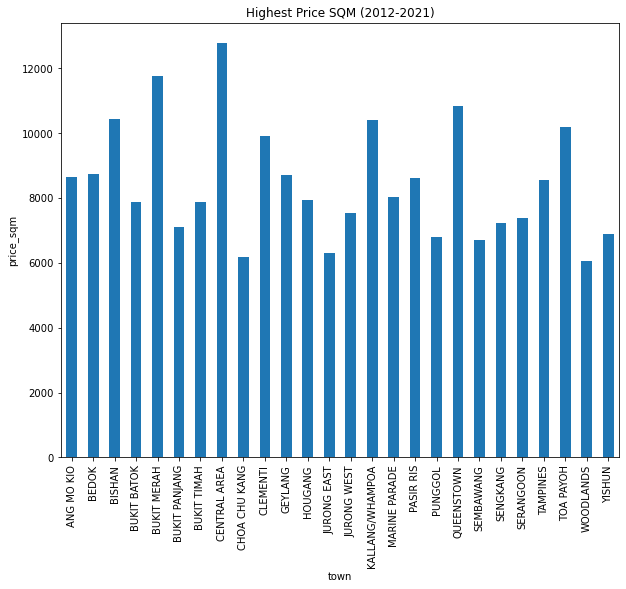

In [35]:
# Highest price_sqm in each town (past 10 years) 
grouped_town = df_10y.groupby('town')
grouped_town_psqm_max = grouped_town['price_sqm'].max()
print(grouped_town_psqm_max)

#Plot graph
grouped_town_psqm_max.plot(figsize=(10,8), xlabel="town", ylabel="price_sqm", title="Highest Price SQM (2012-2021)", kind='bar')
grouped_town_psqm_max.max()

#Highest price sqm is Central Area at $12,762.23 per sqm. 


<AxesSubplot:xlabel='flat_type', ylabel='floor_area_sqm'>

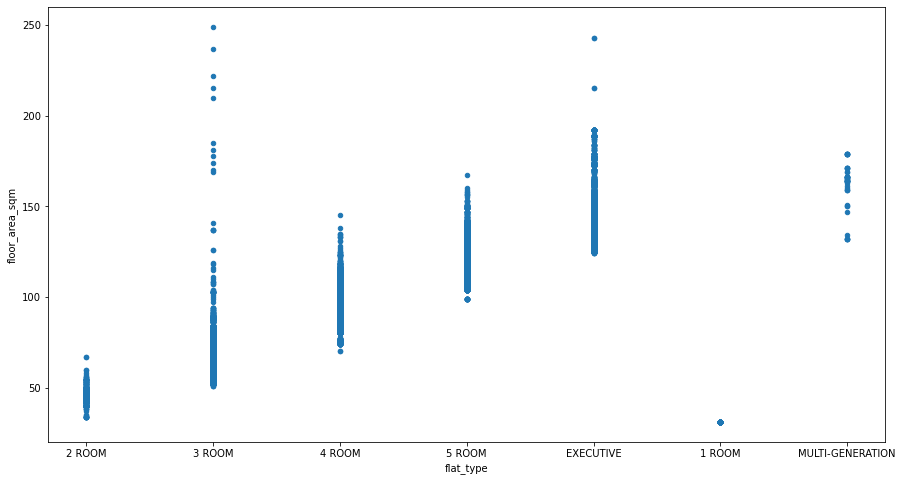

In [36]:
df_5y_2021.plot(x='flat_type',y='floor_area_sqm', kind='scatter', figsize=(15,8))

<AxesSubplot:xlabel='flat_type', ylabel='price_sqm'>

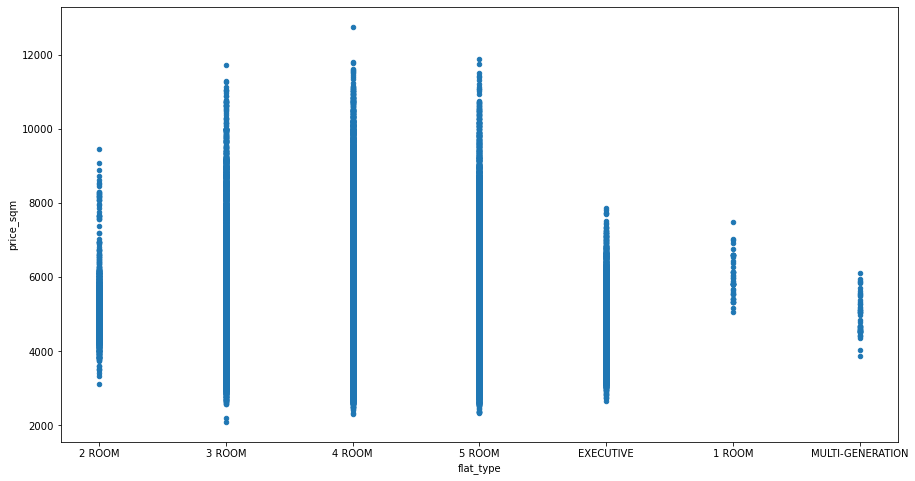

In [37]:
df_5y_2021.plot(x='flat_type',y='price_sqm', kind='scatter', figsize=(15,8))

In [38]:
df_5y_2021.corr()

,month,year,floor_area_sqm,price_sqm,resale_price,remaining_lease_years
month,1.000000,-0.189297,0.001758,-0.024236,-0.017364,0.012937
year,-0.189297,1.000000,-0.001407,0.107144,0.082385,0.020679
floor_area_sqm,0.001758,-0.001407,1.000000,-0.105167,0.626316,0.164641
price_sqm,-0.024236,0.107144,-0.105167,1.000000,0.692853,0.311683
resale_price,-0.017364,0.082385,0.626316,0.692853,1.000000,0.334074
remaining_lease_years,0.012937,0.020679,0.164641,0.311683,0.334074,1.000000
